# Stability test for simulated data 
1. Loads simulated data 
2. Trains multiple instances of DLIM with and without spectral regularization.
3. Computes embedding similarities across runs.
4. Plots of the loss convergence curve 
5. Plots the cosine similarity distribution of embeddings.
6. Boxplot of the Pearson and MSE on D-LIM with and without spectral initialization 

## Import the packages

In [1]:
import sys 
sys.path.append('../')
import os 
from dlim.model import DLIM 
from dlim.dataset import Data_model
from dlim.api import DLIM_API
from src_simulate_data.sim_data import Simulated
from scipy.stats import pearsonr, spearmanr
from sklearn.metrics import r2_score
from numpy import mean
from numpy.random import choice
import pandas as pd
from tqdm import tqdm  
import matplotlib.pyplot as plt 
import numpy as np 
import random 
import torch 
import argparse

In [2]:
#Simulate geometry gaussian data 
data_flag = 'tgaus'
model_save_abs_path = 'pretrained_model/' + str(data_flag) + '/' 
nb_var = 30
data_simulated = Simulated(nb_var, data_flag)

# Create Data_model instance for DLIM
data = Data_model(data=pd.DataFrame(data_simulated.data), n_variables=2)

all_mut_1 = [n for n in data.substitutions_tokens[0].keys() if n != "WT"]
all_mut_2 = [n for n in data.substitutions_tokens[1].keys() if n != "WT"]
random.seed(42)

# Split data into training and validation 
train_id = choice(range(data.data.shape[0]), int(data.data.shape[0]*0.7), replace=False)
val_id = [i for i in range(data.data.shape[0]) if i not in train_id]
train_data = data.subset(train_id)
val_data = data.subset(val_id)

# Define hyperparameters 
run_iter = 10
max_patience = 20
dropout_ratio = 0.3
best_loss_arr = []
tmp = []
tem_latent = []
for i in range(run_iter):

    torch.manual_seed(42+i)
    model = DLIM(n_variables = data.nb_val, hid_dim = 32, nb_layer = 1, gap_thres=[0.01, 0.95], dropout_ratio=dropout_ratio, batch_norm=True)
    
    # Create DLIM_API instance for training and prediction, using spectral initialization
    dlim_regressor = DLIM_API(model=model, flag_spectral=True)
    model_save_path = None #model_save_abs_path + str(data_flag) + '_spec' + str(i) + '.pt'
    losses, best_model, best_loss = dlim_regressor.fit(train_data, val_data, lr = 1e-3, weight_decay= 1e-2, nb_epoch=300, batch_size=64, \
        emb_regularization=0, save_path=model_save_path, max_patience= max_patience, return_best_model=True)

    fit_a, var_a, lat_a = dlim_regressor.predict(val_data.data[:,:-1], detach=True) 

    score = pearsonr(fit_a.flatten(), val_data.data[:, [-1]].flatten())[0]
    print(score)


    model_ns = DLIM(n_variables = data.nb_val, hid_dim = 32, nb_layer = 1, gap_thres=[0.01, 0.95], dropout_ratio=dropout_ratio, batch_norm=True)
    # Create DLIM_API instance for training and prediction, without spectral initialization
    dlim_regressor_ns = DLIM_API(model=model_ns, flag_spectral=False)
    model_save_path = None # model_save_abs_path + str(data_flag) + '_no_spec'+ str(i) + '.pt'
    losses_ns, best_model_ns, best_loss_ns = dlim_regressor_ns.fit(train_data, val_data, lr = 1e-3, weight_decay= 1e-2,nb_epoch=300, batch_size=64, \
        emb_regularization=0, save_path=model_save_path, max_patience= max_patience, return_best_model=True)

    fit_ns, var_ns, lat_ns = dlim_regressor_ns.predict(val_data.data[:,:-1], detach=True) 

    score_ns = pearsonr(fit_ns.flatten(), val_data.data[:, [-1]].flatten())[0]
    print(score_ns)
    _, vl = zip(*losses)
    _, vl_ns = zip(*losses_ns)
    tmp += [(vl, vl_ns)]

    # Get loss and scores 
    best_loss_arr += [(best_loss, best_loss_ns, score, score_ns)]

    # Get embeddings 
    araa_d = [dlim_regressor.model.genes_emb[0][data.substitutions_tokens[0][n]].detach().numpy() for n in all_mut_1]
    arab_d = [dlim_regressor.model.genes_emb[1][data.substitutions_tokens[1][n]].detach().numpy() for n in all_mut_2]
    res =  (araa_d, arab_d) 

    tem_latent.append(res)




spectral gap = 0.556014358997345
spectral gap = 0.45398780703544617


/home/alexandre/miniconda3/envs/dlim_env/lib/python3.11/site-packages/torch/autograd/graph.py:829: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 10010). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at /pytorch/c10/cuda/CUDAFunctions.cpp:109.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


0.9983892814428929
0.7948028423698599
spectral gap = 0.556014358997345
spectral gap = 0.45398780703544617
0.9984450892502885
0.7984490824856234
spectral gap = 0.556014358997345
spectral gap = 0.45398780703544617
0.9981936934131778
0.7908125736416125
spectral gap = 0.556014358997345
spectral gap = 0.45398780703544617
0.9982508670480983
0.7745511629388985
spectral gap = 0.556014358997345
spectral gap = 0.45398780703544617
0.9985136384038992
0.7805409805417133
spectral gap = 0.556014358997345
spectral gap = 0.45398780703544617
0.9982381376259809
0.775640160585625
spectral gap = 0.556014358997345
spectral gap = 0.45398780703544617
0.9985626618906805
0.8023594762569731
spectral gap = 0.556014358997345
spectral gap = 0.45398780703544617
0.9982542954308017
0.47987154825287837
spectral gap = 0.556014358997345
spectral gap = 0.45398780703544617
0.998489716631809
0.7892000647312145
spectral gap = 0.556014358997345
spectral gap = 0.45398780703544617
0.9983514367055687
0.7897563060812834


## Visualization of the results 

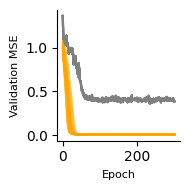

0.0031242622865163367 0.4053214757120953


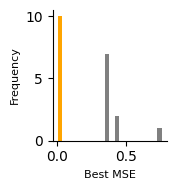

0.0031242622865163367 0.4053214757120953
0.9983688817843198 0.7575984197885682


/tmp/ipykernel_466253/1995764370.py:42: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/tmp/ipykernel_466253/1995764370.py:61: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


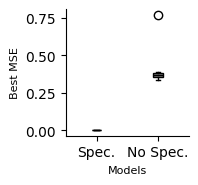

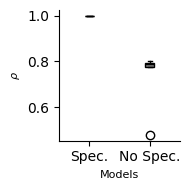

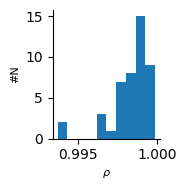

In [ ]:
# Plot the MSE loss curve with the training process 
fig, ax = plt.subplots(figsize=(2, 2))
for vl, vl_sn in tmp:
    ax.plot(vl, linestyle="-", c="orange", alpha=0.7)
    ax.plot(vl_ns, linestyle="-", c="grey", alpha=0.7)
for el in ["top", "right"]:
    ax.spines[el].set_visible(False)
ax.set_xlabel("Epoch", fontsize=8)
ax.set_ylabel("Validation MSE", fontsize=8)
plt.tight_layout()
plt.show()

# Plot the distrubution of MSE after D-LIM training  
fig, ax = plt.subplots(figsize=(2, 2))
vl_last, vl_ns_last, pears_last, pears_no_last = zip(*[(vl_min, vl_ns_min, pears, pears_no) for vl_min, vl_ns_min, pears, pears_no in best_loss_arr])
print(mean(vl_last), mean(vl_ns_last))
ax.hist([vl_last, vl_ns_last], color=["orange", "grey"])
for el in ["top", "right"]:
    ax.spines[el].set_visible(False)
ax.set_xlabel("Best MSE", fontsize=8)
ax.set_ylabel("Frequency", fontsize=8)
plt.tight_layout()
plt.show()

# Boxplot of MSE after D-LIM training  
fig, ax = plt.subplots(figsize=(2, 2))
print(mean(vl_last), mean(vl_ns_last))
tick_labels=['Spec.', 'No Spec.']
bplot = ax.boxplot([vl_last, vl_ns_last], patch_artist=True)
ax.set_xticklabels(tick_labels)
colors =["orange", "grey"]
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
for patch, color in zip(bplot['medians'], colors):
    patch.set_color('black')

for el in ["top", "right"]:
    ax.spines[el].set_visible(False)
ax.set_xlabel("Models", fontsize=8)
ax.set_ylabel("Best MSE", fontsize=8)
plt.tight_layout()
fig.show()

# Boxplot of Pearson after D-LIM training  
fig, ax = plt.subplots(figsize=(2, 2))
print(mean(pears_last), mean(pears_no_last))
tick_labels=['Spec.', 'No Spec.']
bplot = ax.boxplot([pears_last, pears_no_last], patch_artist=True)
ax.set_xticklabels(tick_labels)
colors =["orange", "grey"]
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
for patch, color in zip(bplot['medians'], colors):
    patch.set_color('black')

for el in ["top", "right"]:
    ax.spines[el].set_visible(False)
ax.set_xlabel("Models", fontsize=8)
ax.set_ylabel("$\\rho$", fontsize=8)
plt.tight_layout()
fig.show()


# Get pairwise similarity between infered phenotype after different runs   

def cosine_similarity(a, b):
    a = np.array(a).flatten()
    b = np.array(b).flatten()
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

# Plot the distribution  of the similarity   
dist_l = []
for i, (g1i, g2j) in enumerate(tem_latent):
    for j, (g1j, g2j) in enumerate(tem_latent[i+1:], start=i+1):
        dist_l += [abs(cosine_similarity(g1i, g1j))]
fig, ax = plt.subplots(figsize=(2, 2))
ax.hist(dist_l)
for el in ["top", "right"]:
    ax.spines[el].set_visible(False)
ax.set_xlabel("$\\rho$", fontsize=8)
ax.set_ylabel("#N", fontsize=8)
plt.tight_layout()
plt.show()
